# **Foundations of Data Science** **-**  *****Covid 19 Data Analysis*****



```

```

## **Group Members :**
---
| **Name**        |    **Roll No**   | 
| :---            |    :----:        |
| R.Abhinav       | CB.EN.U4CSE19453 |
| P.Kalaiarasan   | CB.EN.U4CSE19446 |
| P.Koushik       | CB.EN.U4CSE19449 |
| S.Shanthan      | CB.EN.U4CSE19459 |

---

## **ABSTRACT**: 
The coronavirus (COVID-19) that was first reported at the end of 2019 has impacted every aspect of life as we know it. This case study focuses on incorporating field of data science with rising cases of covid or any such pandemics. Using few data pre-processing and cleaning techniques, we modelled the system to predict daily and cumulative incidence of COVID-19 cases throughout the world, death to infected ratio and such useful data which helps us in tackling the challenge we are up against. The coronavirus (COVID-19) has affected 181 countries with approximately 1,87,93,542 confirmed cases. Our model helps in understanding the transmission dynamics of the infection in each country which got affected on a daily basis and evaluating the effectiveness of control policies are critical for our further actions. To date, the statistics of COVID19 reported cases show that more than 80% of infected are mild cases of disease, around 14% of infected have severe complications, and about 5% are categorized as critical disease victims. The data obtained from this model can be used implement effective policies that yielded significant changes in the trend of cases like lockdown policy, shutdown of all nonessential companies.  

## **MOTIVATION AND OBJECTIVE:**
We apply our method to predicting the number of new COVID-19 cases in India and for a subset of counties within the state to demonstrate the utility of this method at varying scales of prediction. Our method produces reasonably accurate results when the effective reproduction number is distributed similarly in the future as in the past. Large deviations from the predicted results can imply that a change in policy or some other factors have occurred that have dramatically altered the disease transmission over time. 

## **Selection of data**

In [1]:
# Importing essential libraries
import pandas as pd
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading csv file to dataframe using .read_csv

covid19 = pd.read_csv('/content/drive/MyDrive/FoDS Project/covid.csv')

In [4]:
# Exploring first five rows of dataframe
covid19.head(5)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.56,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.84,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.84,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.84,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


## **Exploring Dataset**

In [5]:
# Shape of dataset
covid19.shape

(19496, 32)

Observation: Rows -19496 , Columns-32

In [6]:
# Columns in covid19 dataset
covid19.columns

Index(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_100k'],
      dtype='object')

In [7]:
# Finding different locations of dataset
covid19["location"].value_counts()

Estonia           146
Czech Republic    146
Japan             146
Singapore         146
Switzerland       146
                 ... 
Yemen              45
Western Sahara     29
Tajikistan         24
Comoros            23
Lesotho            10
Name: location, Length: 212, dtype: int64

In [8]:
# Import winsorize function from SciPY module
from scipy.stats.mstats import winsorize

df = pd.read_csv('/content/drive/MyDrive/FoDS Project/covid.csv')

df["total_cases"] = winsorize(df["total_cases"], (0.01,0.14))
df["new_cases"] = winsorize(df["new_cases"], (0.01,0.135))
df["total_deaths"] = winsorize(df["total_deaths"], (0.01,0.146))
df["new_deaths"] = winsorize(df["new_deaths"], (0.01,0.14))
df["total_cases_per_million"] = winsorize(df["total_cases_per_million"], (0.01,0.14))
df["new_cases_per_million"] = winsorize(df["new_cases_per_million"], (0.01,0.14))
df["total_deaths_per_million"] = winsorize(df["total_deaths_per_million"], (0.01,0.14))

Observation: There are 212 different locations in dataset

### **Data Preprocessing**

In [9]:
# Checking if there are any columns with null values
covid19.isna().any()

iso_code                            True
location                           False
date                               False
total_cases                        False
new_cases                          False
total_deaths                       False
new_deaths                         False
total_cases_per_million             True
new_cases_per_million               True
total_deaths_per_million            True
new_deaths_per_million              True
total_tests                         True
new_tests                           True
total_tests_per_thousand            True
new_tests_per_thousand              True
new_tests_smoothed                  True
new_tests_smoothed_per_thousand     True
tests_units                         True
stringency_index                    True
population                          True
population_density                  True
median_age                          True
aged_65_older                       True
aged_70_older                       True
gdp_per_capita  

Observation: There are 26 columns with null values

In [10]:
# Finding the sum of null values in each column
covid19.isna().sum()

iso_code                              64
location                               0
date                                   0
total_cases                            0
new_cases                              0
total_deaths                           0
new_deaths                             0
total_cases_per_million              377
new_cases_per_million                377
total_deaths_per_million             377
new_deaths_per_million               377
total_tests                        14332
new_tests                          14904
total_tests_per_thousand           14332
new_tests_per_thousand             14904
new_tests_smoothed                 13866
new_tests_smoothed_per_thousand    13866
tests_units                        13267
stringency_index                    4500
population                            64
population_density                   850
median_age                          1743
aged_65_older                       1980
aged_70_older                       1832
gdp_per_capita  

In [11]:
# Replacing NaN values in every column with 0
import numpy as np
covid19.replace(np.nan, 0, inplace = True)

## **Data Visualization**

In [12]:
# Exploring data location == India
india = covid19[covid19["location"] == "India"] 
india.head(5)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8379,IND,India,2019-12-31,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8380,IND,India,2020-01-01,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8381,IND,India,2020-01-02,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8382,IND,India,2020-01-03,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8383,IND,India,2020-01-04,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


In [13]:
# Importing seaborn library alias sns
# Importing pyplot library from Matplotlib as plt
import seaborn as sns
from matplotlib import pyplot as plt

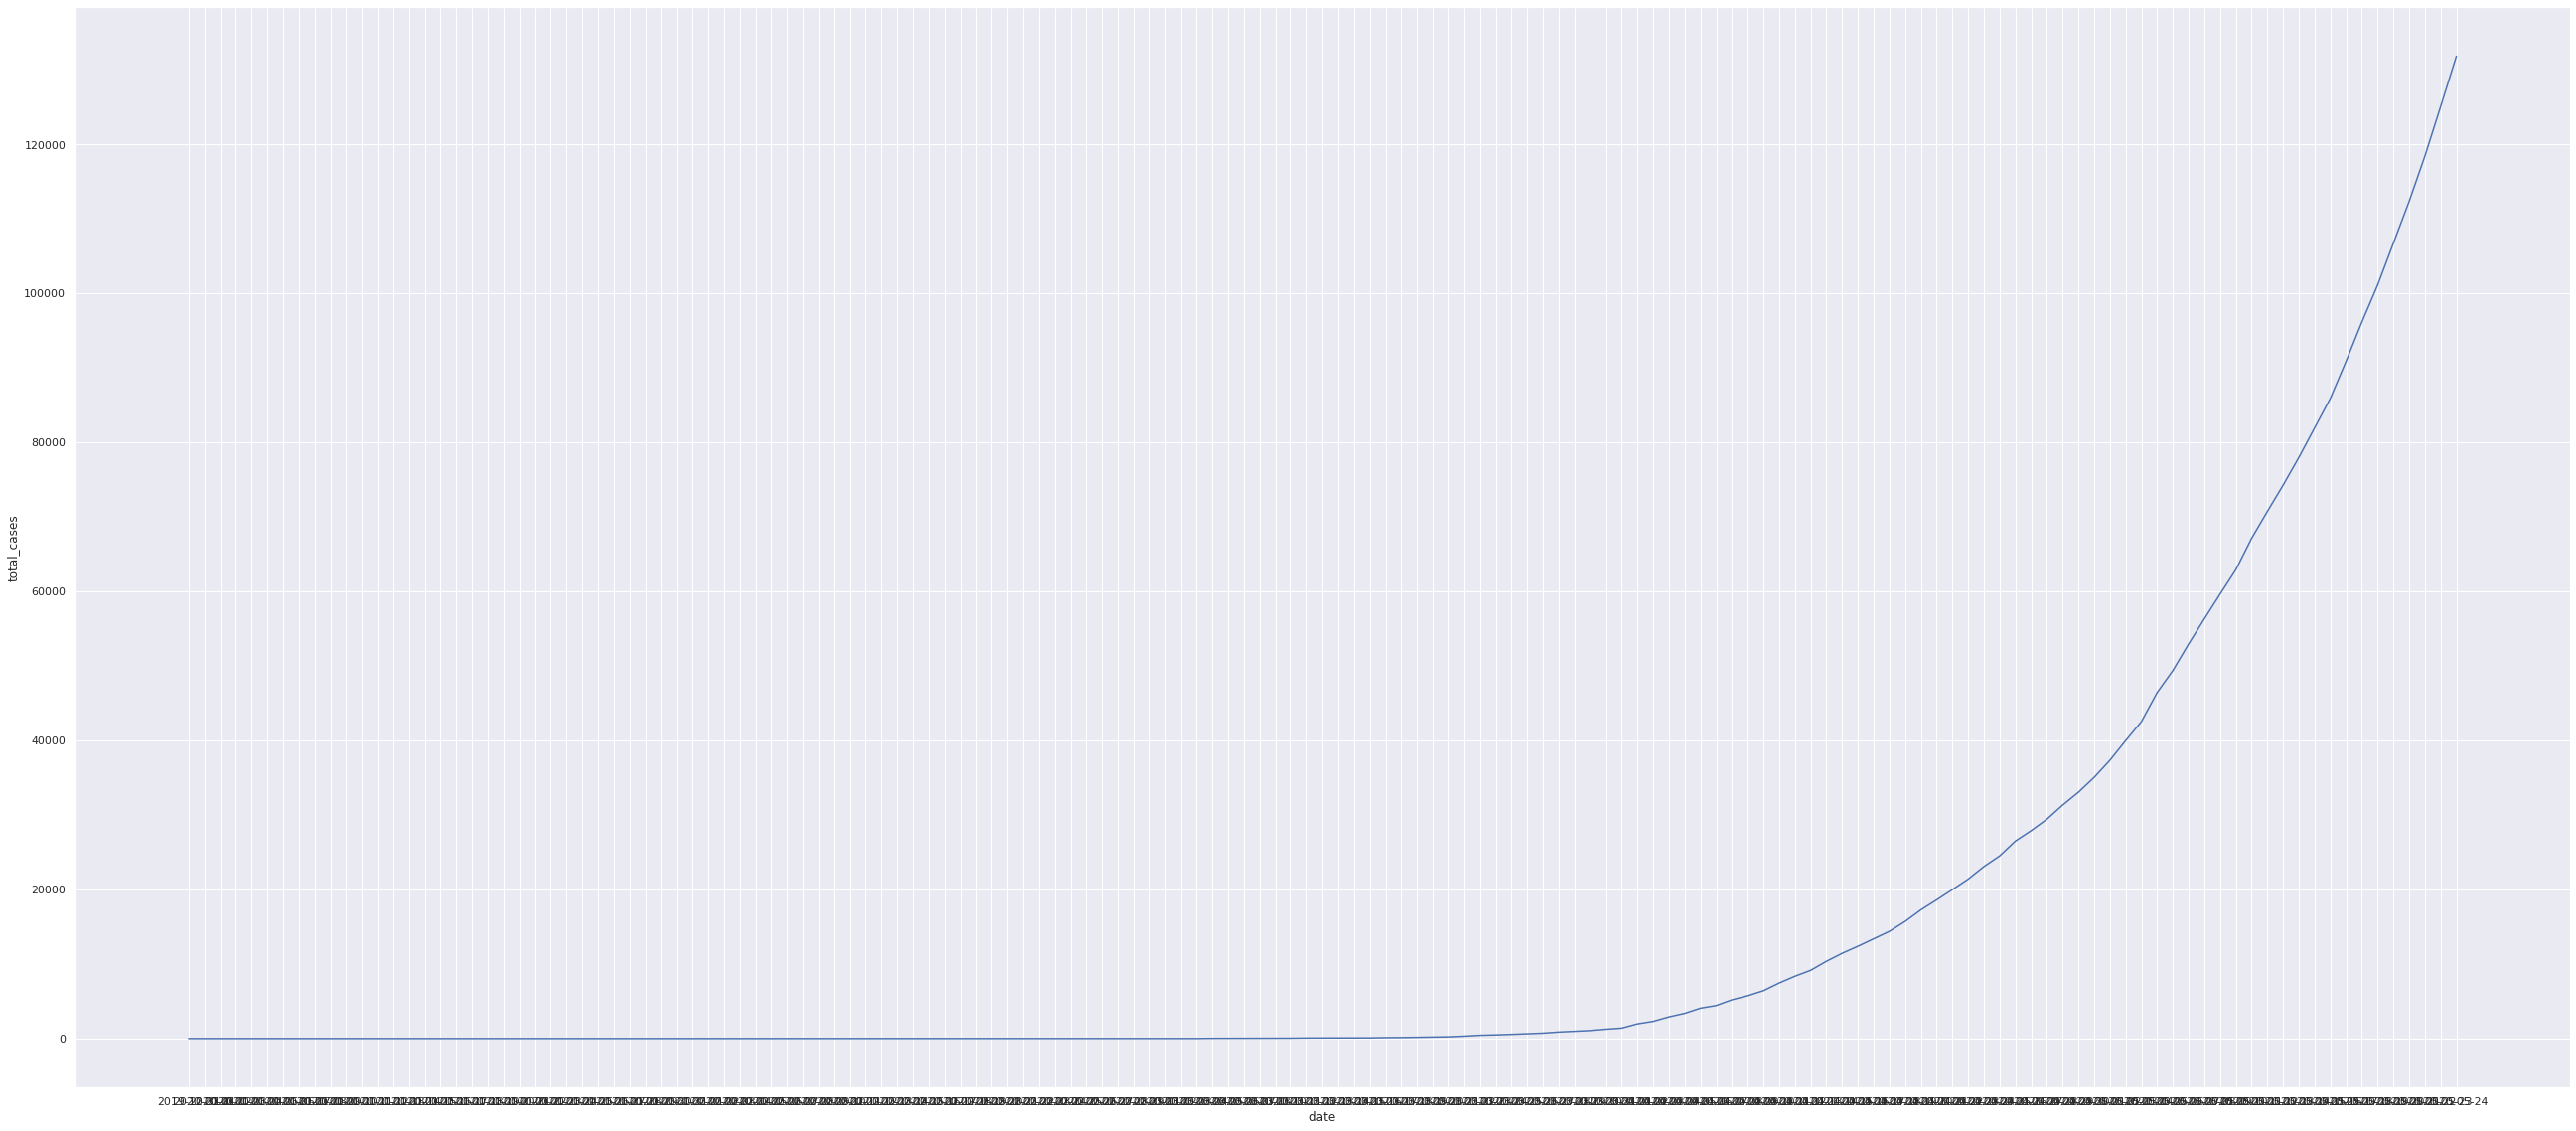

In [14]:
# Finding Cases per day
sns.set(rc = {'figure.figsize':(45, 20)})
sns.lineplot(x = "date", y = "total_cases", data = india)
plt.show()

Observation: The above graph depicts relation b/w total number of cases on that date

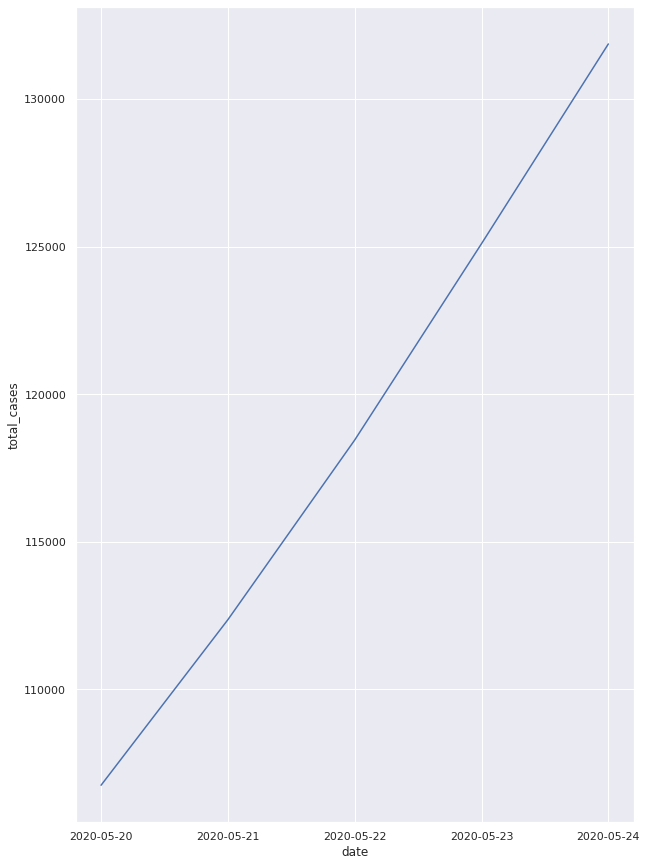

In [15]:
#Total cases in last 5 days
sns.set(rc = {'figure.figsize': (10, 15)})
sns.lineplot(x = "date", y = "total_cases", data = india.tail())
plt.show()

Observation: The above graph depicts relation b/w total number of cases on that date for last five days

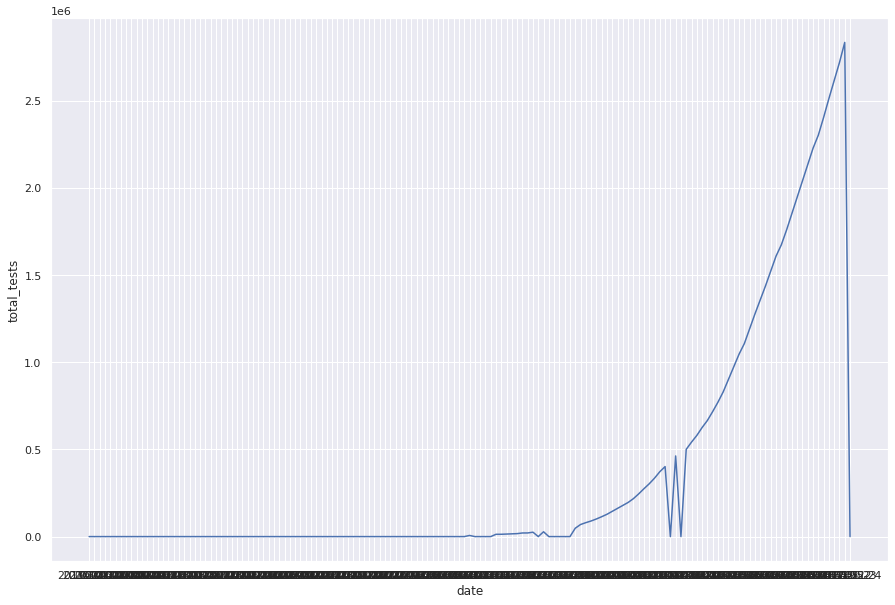

In [16]:
# Finding tests per day
sns.set(rc = {'figure.figsize':(15, 10)})
sns.lineplot(x = "date", y = "total_tests", data = india)
plt.show()

Observation: The above graph depicts relation b/w total number of tests on that date 

In [17]:
# Getting latest data
LastDay_cases = covid19[covid19["date"] == "2020-05-24"]
LastDay_cases

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
62,ABW,Aruba,2020-05-24,101,0,3,0,945.994,0.000,28.099,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.067660e+05,584.800,41.2,13.085,7.452,35973.781,0.0,0.000,11.62,0.000,0.000,0.000,0.000
198,AFG,Afghanistan,2020-05-24,9998,782,216,11,256.831,20.088,5.549,0.283,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.000,0.000,37.746,0.500
262,AGO,Angola,2020-05-24,60,0,3,0,1.826,0.000,0.091,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,3.286627e+07,23.890,16.8,2.405,1.362,5819.495,0.0,276.045,3.94,0.000,0.000,26.664,0.000
321,AIA,Anguilla,2020-05-24,3,0,0,0,199.973,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.500200e+04,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000
398,ALB,Albania,2020-05-24,989,8,31,0,343.665,2.780,10.772,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,0.000,2.890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19045,YEM,Yemen,2020-05-24,212,7,39,6,7.108,0.235,1.308,0.201,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2.982597e+07,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700
19153,ZAF,South Africa,2020-05-24,21343,1218,407,10,359.863,20.537,6.862,0.169,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,5.930869e+07,46.754,27.3,5.344,3.053,12294.876,18.9,200.380,5.52,8.100,33.200,43.993,2.320
19220,ZMB,Zambia,2020-05-24,920,0,7,0,50.044,0.000,0.381,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.838396e+07,22.995,17.7,2.480,1.542,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000
19285,ZWE,Zimbabwe,2020-05-24,56,0,4,0,3.768,0.000,0.269,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.486293e+07,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.600,30.700,36.791,1.700


In [18]:
# Sorting data based on total_cases on lastday
max_cases = LastDay_cases.sort_values(by = "total_cases", ascending = False)
max_cases

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
19431,OWID_WRL,World,2020-05-24,5273572,97636,341722,3633,676.550,12.526,43.840,0.466,0.0,0.0,0.000,0.000,0.0,0.000,0,0.00,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705
18391,USA,United States,2020-05-24,1622670,21236,97087,1080,4902.287,64.157,293.312,3.263,0.0,0.0,0.000,0.000,0.0,0.000,0,0.00,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,0.000,2.770
2655,BRA,Brazil,2020-05-24,347398,16508,22013,965,1634.357,77.663,103.562,4.540,0.0,0.0,0.000,0.000,0.0,0.000,0,0.00,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,0.000,2.200
15569,RUS,Russia,2020-05-24,335882,9434,3388,139,2301.595,64.645,23.216,0.952,8685305.0,282558.0,59.515,1.936,252745.0,1.732,tests performed,0.00,1.459345e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.400,58.300,0.000,8.050
9396,ITA,Italy,2020-05-24,229327,669,32735,119,3792.922,11.065,541.416,1.968,0.0,0.0,0.000,0.000,0.0,0.000,0,67.06,6.046183e+07,205.859,47.9,23.021,16.240,35220.084,2.0,113.151,4.78,19.800,27.800,0.000,3.180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18723,VGB,British Virgin Islands,2020-05-24,8,0,1,0,264.577,0.000,33.072,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0,0.00,3.023700e+04,207.973,0.0,0.000,0.000,0.000,0.0,0.000,13.67,0.000,0.000,0.000,0.000
1645,BES,Bonaire Sint Eustatius and Saba,2020-05-24,6,0,0,0,228.824,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0,0.00,2.622100e+04,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000
5543,ESH,Western Sahara,2020-05-24,6,0,0,0,10.045,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0,0.00,5.973300e+05,0.000,28.4,0.000,1.380,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000
321,AIA,Anguilla,2020-05-24,3,0,0,0,199.973,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0,0.00,1.500200e+04,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000


In [19]:
# Top 5 countries having maximum number cases on last day
max_cases[1:6]

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
18391,USA,United States,2020-05-24,1622670,21236,97087,1080,4902.287,64.157,293.312,3.263,0.0,0.0,0.000,0.000,0.0,0.000,0,0.00,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77
2655,BRA,Brazil,2020-05-24,347398,16508,22013,965,1634.357,77.663,103.562,4.540,0.0,0.0,0.000,0.000,0.0,0.000,0,0.00,212559409.0,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.20
15569,RUS,Russia,2020-05-24,335882,9434,3388,139,2301.595,64.645,23.216,0.952,8685305.0,282558.0,59.515,1.936,252745.0,1.732,tests performed,0.00,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,0.0,8.05
9396,ITA,Italy,2020-05-24,229327,669,32735,119,3792.922,11.065,541.416,1.968,0.0,0.0,0.000,0.000,0.0,0.000,0,67.06,60461828.0,205.859,47.9,23.021,16.240,35220.084,2.0,113.151,4.78,19.8,27.8,0.0,3.18
4613,DEU,Germany,2020-05-24,178281,431,8247,31,2127.866,5.144,98.432,0.370,0.0,0.0,0.000,0.000,0.0,0.000,0,0.00,83783945.0,237.016,46.6,21.453,15.957,45229.245,0.0,156.139,8.31,28.2,33.1,0.0,8.00


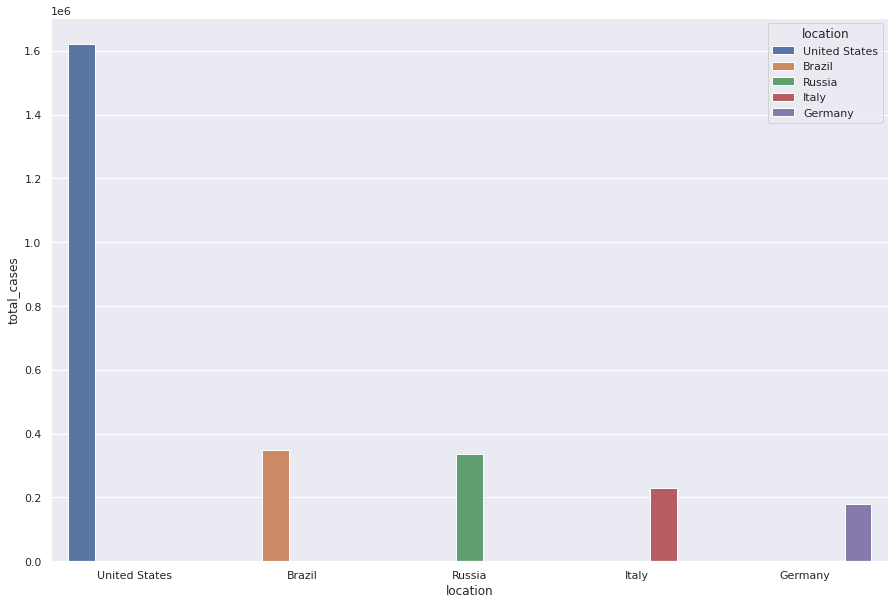

In [20]:
# Plotting bar graph for countries with maximum number of cases
sns.barplot(x = "location", y = "total_cases", data = max_cases[1:6], hue = "location")
plt.show()

Observation: United States has maximum no of cases whereas germany has least no of cases

(-0.5, 1439.5, 1079.5, -0.5)

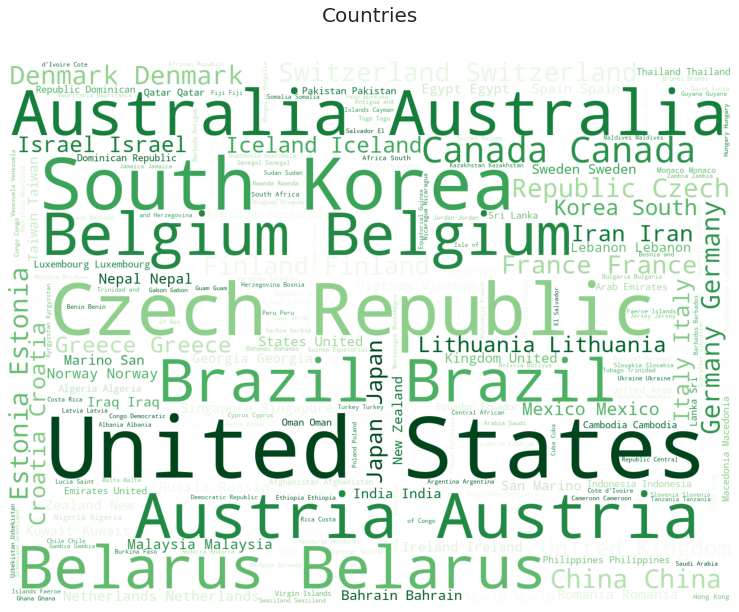

In [21]:
from wordcloud import WordCloud 
cloud = WordCloud(width=1440, height=1080,stopwords={'nan'},colormap='Greens',background_color='white').generate(" ".join(covid19['location'].astype(str)))
plt.figure(figsize=(16, 10))
plt.title('Countries',fontsize=20,pad=40)
plt.imshow(cloud)
plt.axis('off')

## **Feature Selection**

In [22]:
# Importing datetime package as dt
# Converting date in 'string' format to 'date' format
import datetime as dt
india['date'] = pd.to_datetime(india['date']) 
india.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8379,IND,India,2019-12-31,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8380,IND,India,2020-01-01,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8381,IND,India,2020-01-02,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8382,IND,India,2020-01-03,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8383,IND,India,2020-01-04,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


In [23]:
# Converting column date to ordinal
india['date']=india['date'].map(dt.datetime.toordinal)
india.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8379,IND,India,737424,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8380,IND,India,737425,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8381,IND,India,737426,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8382,IND,India,737427,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8383,IND,India,737428,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


In [24]:
data = india.drop(['iso_code','location','tests_units'], axis = 1)

In [25]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(data)

VarianceThreshold(threshold=0)

In [26]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [27]:
data.columns[var_thres.get_support()]

Index(['date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'total_cases_per_million', 'new_cases_per_million',
       'total_deaths_per_million', 'new_deaths_per_million', 'total_tests',
       'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'stringency_index'],
      dtype='object')

In [28]:
constant_columns=[column for column in data.columns if column not in data.columns[var_thres.get_support()]]

In [29]:
constant_columns

['population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cvd_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'hospital_beds_per_100k']

In [30]:
len(constant_columns)

13

In [31]:
data.drop(constant_columns,axis=1,inplace=True)

In [32]:
data

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,stringency_index
8379,737424,0,0,0,0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.00
8380,737425,0,0,0,0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.00
8381,737426,0,0,0,0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.00
8382,737427,0,0,0,0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.00
8383,737428,0,0,0,0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8519,737565,106750,5611,3303,140,77.355,4.066,2.393,0.101,2512388.0,108121.0,1.821,0.078,94020.0,0.068,76.07
8520,737566,112359,5609,3435,132,81.419,4.064,2.489,0.096,2615920.0,103532.0,1.896,0.075,95554.0,0.069,76.07
8521,737567,118447,6088,3583,148,85.831,4.412,2.596,0.107,2719434.0,103514.0,1.971,0.075,97069.0,0.070,76.07
8522,737568,125101,6654,3720,137,90.653,4.822,2.696,0.099,2834798.0,115364.0,2.054,0.084,100074.0,0.073,76.07


## **Test, Train split**

In [33]:
# Spliting data into features and result
x = india['date'].values.reshape(-1,1)
y = india['total_cases'].values

In [34]:
# Test, Train split (80, 20)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [35]:
model=[]
score=[]

## **Linear Regression Model**

In [36]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

clf = LinearRegression(normalize=True)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
x = r2_score(y_test,y_pred)
model.append('LR')
score.append(x*100)

print(x)

0.5257551259071506


In [37]:
# Importing mean squared error function
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('MAE:', mean_absolute_error(y_pred, y_test))
print('RMSE:',np.sqrt(mean_squared_error(y_pred, y_test)))

MAE: 17078.352615923715
RMSE: 25452.907666122166


In [38]:
india.tail()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8519,IND,India,737565,106750,5611,3303,140,77.355,4.066,2.393,0.101,2512388.0,108121.0,1.821,0.078,94020.0,0.068,samples tested,76.07,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8520,IND,India,737566,112359,5609,3435,132,81.419,4.064,2.489,0.096,2615920.0,103532.0,1.896,0.075,95554.0,0.069,samples tested,76.07,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8521,IND,India,737567,118447,6088,3583,148,85.831,4.412,2.596,0.107,2719434.0,103514.0,1.971,0.075,97069.0,0.070,samples tested,76.07,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8522,IND,India,737568,125101,6654,3720,137,90.653,4.822,2.696,0.099,2834798.0,115364.0,2.054,0.084,100074.0,0.073,samples tested,76.07,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8523,IND,India,737569,131868,6767,3867,147,95.556,4.904,2.802,0.107,0.0,0.0,0.000,0.000,0.0,0.000,0,76.07,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


In [39]:
# Trying to predict using lr model 
clf.predict([[737569]])


array([48447.41744941])

In [40]:
for i in range(737569,737579):
  print(clf.predict([[i]]))

[48447.41744941]
[48911.08726835]
[49374.75708735]
[49838.42690629]
[50302.09672523]
[50765.76654422]
[51229.43636316]
[51693.1061821]
[52156.7760011]
[52620.44582003]


In [41]:
lg_pred=[]
for i in range(737569,737579):
  lg_pred.append(clf.predict([[i]]))

In [42]:
lg_pred

[array([48447.41744941]),
 array([48911.08726835]),
 array([49374.75708735]),
 array([49838.42690629]),
 array([50302.09672523]),
 array([50765.76654422]),
 array([51229.43636316]),
 array([51693.1061821]),
 array([52156.7760011]),
 array([52620.44582003])]

## **Decision Tree Regression**

In [43]:

# import the regressor
from sklearn.tree import DecisionTreeRegressor  
# create a regressor object
dtr = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
dtr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [44]:
y_pred = dtr.predict(x_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred))) 
print('R2 Score:',r2_score(y_test, y_pred)*100)
x = r2_score(y_test, y_pred)
model.append('Decision Tree')
score.append(x*100)

RMSE: 2181.0904817671303
R2 Score: 99.65176276456948


## **Random Forest Regression**

In [45]:
from sklearn.ensemble import RandomForestRegressor
  
# create regressor object
rf = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with X and Y data
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [46]:
y_pred = rf.predict(x_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred))) 
print('R2 Score:',r2_score(y_test, y_pred)*100)
x = r2_score(y_test, y_pred)
model.append('Random Forest')
score.append(x*100)

RMSE: 2438.216460264941
R2 Score: 99.56481656176


## **SVM Model**

In [47]:
from sklearn.preprocessing import MinMaxScaler
mscaler = MinMaxScaler()
india["total_cases"] = mscaler.fit_transform(india["total_cases"].values.reshape(-1,1))
india['total_deaths']=mscaler.fit_transform(india["total_cases"].values.reshape(-1,1))

In [48]:
# Spliting data into features and result
x = india['total_cases'].values.reshape(-1,1)
y = india['total_deaths'].values.reshape(-1,1)

In [49]:
# Test, Train split (80, 20)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [50]:
from sklearn.svm import SVR
from sklearn import svm
x=[]
y=[]
y2=[]
for i in range(1,10):
    clf = svm.SVR(kernel='rbf',C=i)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(y_test)
    x.append(i)
    y.append(r2_score(y_test,y_pred)*100)
    

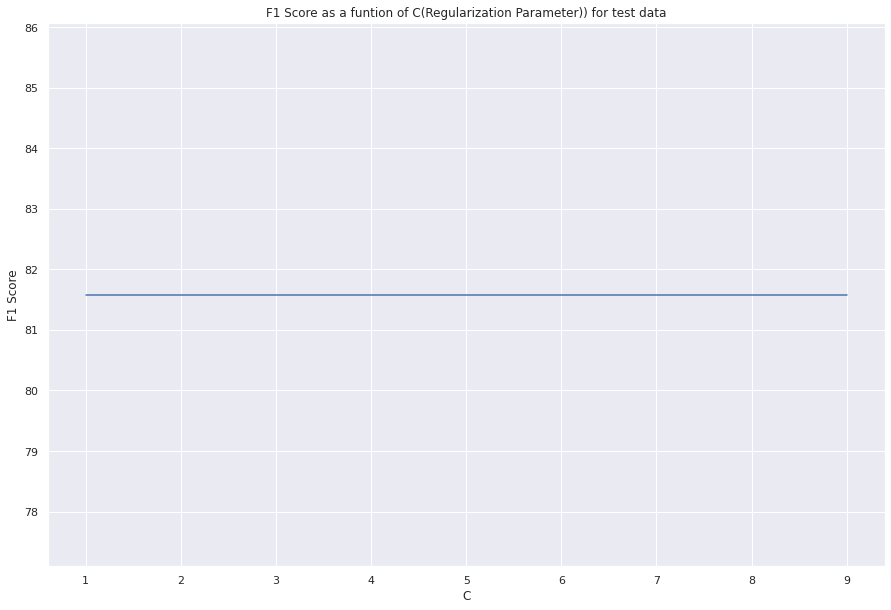

In [51]:
plt.plot(x,y)
plt.title("F1 Score as a funtion of C(Regularization Parameter)) for test data")
plt.xlabel("C")
plt.ylabel("F1 Score")
plt.show()

In [52]:
svm_model = SVR(shrinking = True, kernel = 'poly', gamma = 0.01, epsilon = 1, degree = 5, C = 1)
svm_model.fit(x_train,y_train)

SVR(C=1, degree=5, epsilon=1, gamma=0.01, kernel='poly')

In [53]:
from sklearn.metrics import mean_absolute_error
y_pred = svm_model.predict(x_test)

print('MAE:', mean_absolute_error(y_pred, y_test))
print('MSE:',mean_squared_error(y_pred, y_test))
print('RMSE:',np.sqrt(mean_squared_error(y_pred, y_test)))

MAE: 0.40805931323172706
MSE: 0.19323405419378173
RMSE: 0.4395839557965938


##**Ridge Regression**

In [54]:
rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train)


pred_test_rr= rr.predict(x_test)

print('RMSE:',np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print('R2 Score:',r2_score(y_test, pred_test_rr))
x = r2_score(y_test, pred_test_rr)
model.append('Ridge')
score.append(x*100)

RMSE: 0.0003399043110350922
R2 Score: 0.9999974592543888


In [55]:
y_pred=pred_test_rr
print('MAE:', mean_absolute_error(y_pred, y_test))
print('RMSE:',np.sqrt(mean_squared_error(y_pred, y_test)))

MAE: 0.0002754480032096232
RMSE: 0.0003399043110350922


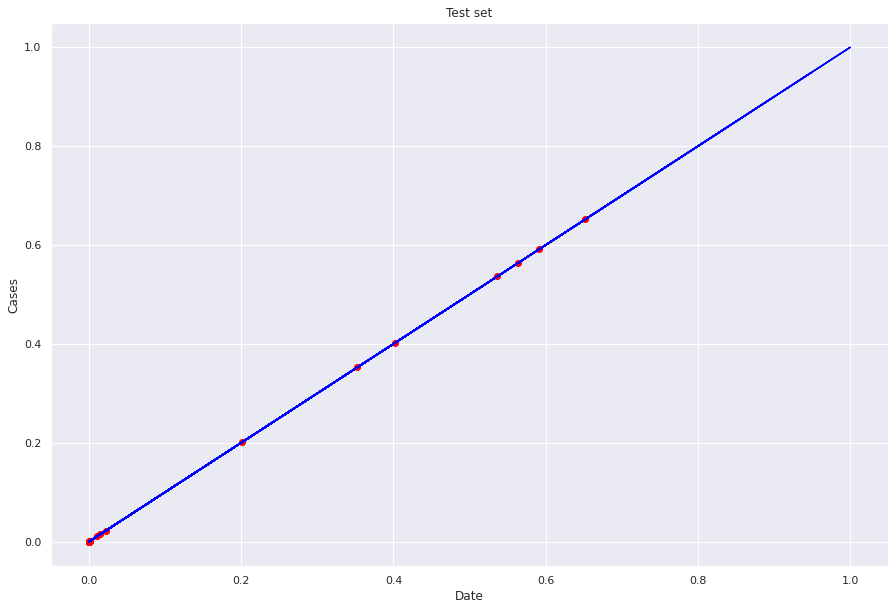

In [56]:
# Visualizing the Test set results
viz_test = plt
viz_test.scatter(x_test, y_test, color='red')
viz_test.plot(x_train, rr.predict(x_train), color='blue')
viz_test.title('Test set')
viz_test.xlabel('Date')
viz_test.ylabel('Cases')
viz_test.show()

In [57]:
for i in range(737569,737579):
  print(rr.predict([[i]]))

[[736393.40533721]]
[[736394.40374333]]
[[736395.40214945]]
[[736396.40055557]]
[[736397.3989617]]
[[736398.39736782]]
[[736399.39577394]]
[[736400.39418006]]
[[736401.39258619]]
[[736402.39099231]]


In [58]:
rr_pred=[]
for i in range(737569,737579):
  rr_pred.append(rr.predict([[i]]))

##**Lasso Regression**

In [59]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train) 

pred_test_lasso= model_lasso.predict(x_test)

print('RMSE:',np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print('R2 Score:',r2_score(y_test, pred_test_lasso)*100)
x = r2_score(y_test, pred_test_lasso)
model.append('Lasso')
score.append(x*100)

RMSE: 0.03949184525527332
R2 Score: 96.57024820820065


## **Elastic Net Regression**

In [60]:
#Elastic Net
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(x_train, y_train) 
pred_test_enet= model_enet.predict(x_test)
x=r2_score(y_test, pred_test_enet)

print('RMSE:',np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print('R2 Score:',x)
x = r2_score(y_test, pred_test_enet)
model.append('Elastic Net')
score.append(x*100)

RMSE: 0.036145081997035804
R2 Score: 0.9712692960503141


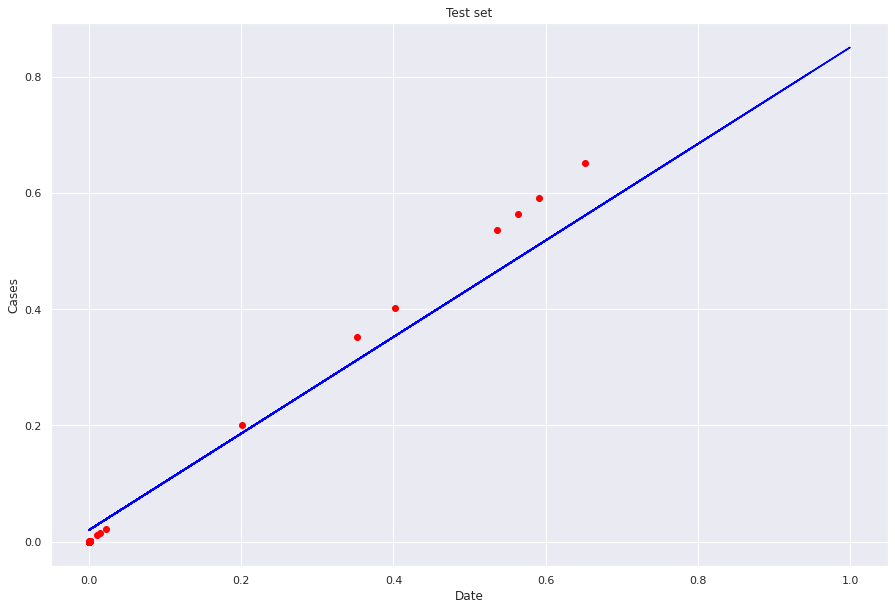

In [61]:
# Visualizing the Test set results
viz_test = plt
viz_test.scatter(x_test, y_test, color='red')
viz_test.plot(x_train, model_enet.predict(x_train), color='blue')
viz_test.title('Test set')
viz_test.xlabel('Date')
viz_test.ylabel('Cases')
viz_test.show()

## **KNN**

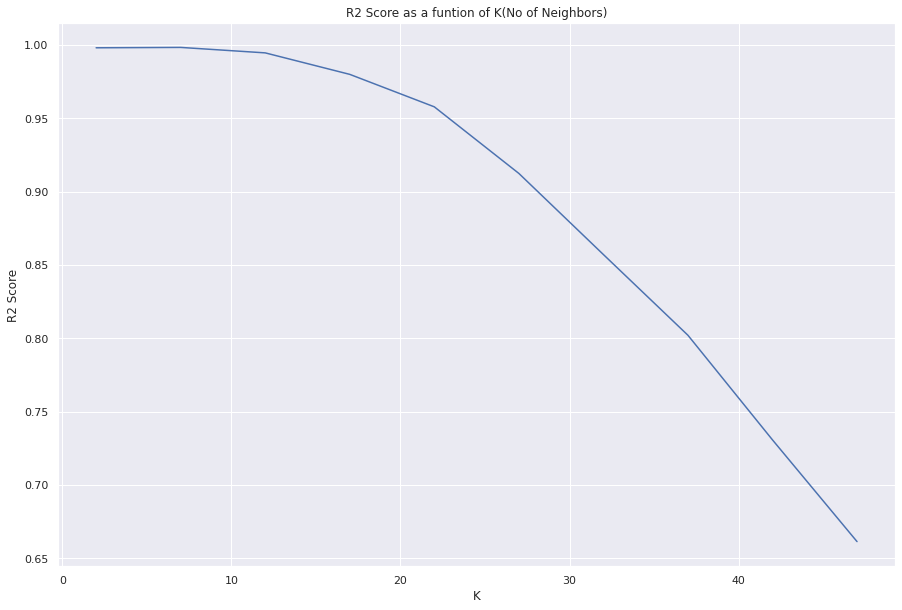

In [62]:
from sklearn.neighbors import KNeighborsClassifier
x=[]
y=[]
for i in range(2,50,5):
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(x_train,y_train)
    y_pred = neigh.predict(x_test)
    x.append(i)
    y.append(r2_score(y_test,y_pred))
plt.plot(x,y)
plt.title("R2 Score as a funtion of K(No of Neighbors)")
plt.xlabel("K")
plt.ylabel("R2 Score")
plt.show()

In [63]:
m=max(y)
m

0.9982860715543361

In [64]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=7)
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)
x = r2_score(y_test,y_pred)
model.append('KNN')
score.append(x*100)
print(x)

0.9982860715543361


d

## **Model Comparison**

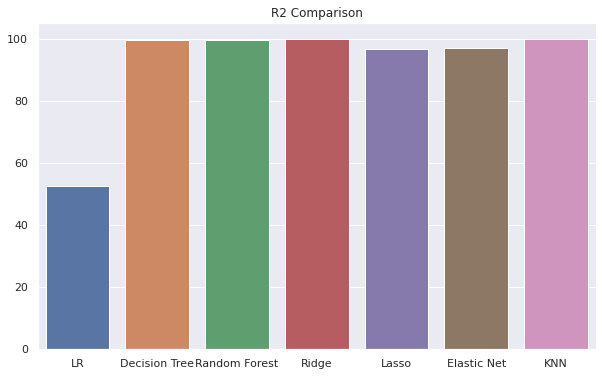

In [65]:
plt.figure(figsize=(10,6))
plt.title('R2 Comparison')
sns.barplot(x=model, y=score, palette='deep')

In [66]:
import pandas as pd
col={'R2 Score':score}
models=['Linear Regression','RR','Lasso','Elatic Net','KNN','Decision Tree','Random Forest']
df=pd.DataFrame(data=col,index=models)
df

,R2 Score
Linear Regression,52.575513
RR,99.651763
Lasso,99.564817
Elatic Net,99.999746
KNN,96.570248
Decision Tree,97.126930
Random Forest,99.828607


In [67]:
df['R2 Score'].sort_values(ascending=True)

Linear Regression    52.575513
KNN                  96.570248
Decision Tree        97.126930
Lasso                99.564817
RR                   99.651763
Random Forest        99.828607
Elatic Net           99.999746
Name: R2 Score, dtype: float64

In [68]:
'''
import lazypredict
from lazypredict.Supervised import LazyRegressor
dummy = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = dummy.fit(x_train, x_test, y_train, y_test)
print(models)
'''

'\nimport lazypredict\nfrom lazypredict.Supervised import LazyRegressor\ndummy = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)\nmodels, predictions = dummy.fit(x_train, x_test, y_train, y_test)\nprint(models)\n'

#### **Z-table:**


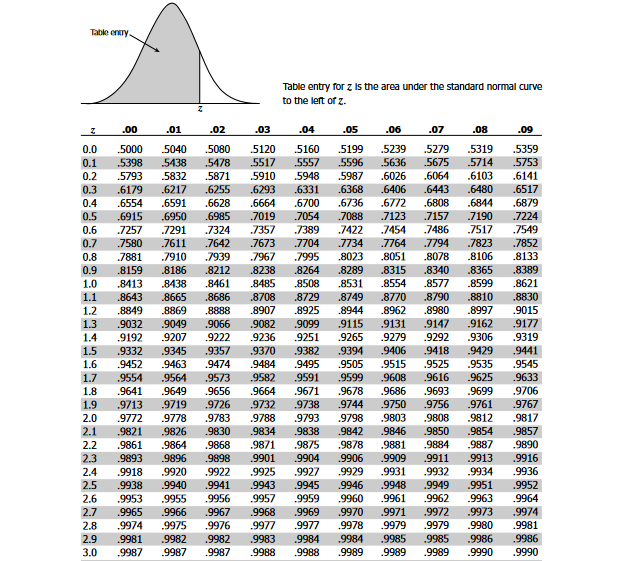

## **Gradient Boosting Regressor**

In [69]:
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

gbr = GradientBoostingRegressor(**gbr_params)

gbr.fit(x_train, y_train)
dy = gbr.score(x_test, y_test)*100
print("Model Accuracy: %.3f" % dy)
mse = mean_squared_error(y_test, gbr.predict(x_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

Model Accuracy: 99.486
The mean squared error (MSE) on test set: 0.0002


### **Inference:**
Gradient Boosting algorithm represents creation of forest of fixed number of decision trees which are called as weak learners or weak predictive models. These decision trees are of fixed size or depth.


##**HYPOTHESIS TESTING**
* Using background knowledge to make a guess about something you have observed.

In [70]:
data.head()

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,stringency_index
8379,737424,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8380,737425,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8381,737426,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8382,737427,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8383,737428,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
data['total_cases'].mean()

15488.441379310345

###**Steps:**




1. Create the hypothesis (Null and Alternate Hypothesis)
2. Appropriate statistical test
3. Let set $\alpha$ as 0.1 i.e Type l error
4. Get data
5. Analyze

$H_{o}:    \mu$=15400

$H_{a}: \mu$ > 15400



value of $z$ at 0.01 we know from $z table$ is $\underline{+}$1.28

### **Test1 : z-Test**

In [72]:
data['total_cases'].sample(70)

8460       320
8394         0
8518    101139
8523    131868
8390         0
         ...  
8508     59662
8421         3
8473      2902
8474      3374
8450        73
Name: total_cases, Length: 70, dtype: int64

In [73]:
s=data[70:140]

In [74]:
sampData=s['total_cases']

In [75]:
meanSampData=sampData.mean()
hypMean=15400
N=70
standPop=np.std(data['total_cases'])

In [76]:
alpha=0.1
degrees_of_freedom = N-1

In [77]:
meanSampData

23586.157142857144

* Mean of sample data > Mean of population data
* So, right tail test

In [78]:
#right tail use absolute value
Z_critical=abs(st.norm.ppf(0.10))
Z_critical

1.2815515655446004

In [79]:
import math
z=(meanSampData-hypMean)/(standPop/math.sqrt(N))
z

2.271211770070908

In [80]:
(2.271211770070908) < (-1.2815515655446004)

False

In [81]:
if (z<Z_critical): #Right-tailed test
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Reject null hypothesis


####**Calculations:**
* as calculated z score 2.27 is greater than 1.28 (tabular z score), we reject the null hypothesis

* if also we would have got -2.27 is greater than -1.28 we would have rejected the Null hypothesis

* Observed value = 2.27

* Critical value = 1.28

####**Inference:** At the 0.1 significance level, there is sufficient evidence to support the claim that the mean score on the test was greater than 15400.

### **Test2 : z-Test using P-value**

#### **p-value (observed significance level)**
Another way to reach a statistical conclusion in hypothesis testing problems is by using the p-value

The p-value defines the smallest probability ($\alpha$) for which the null hypothesis can be rejected.

let say $\alpha = .01$

* if $p \underline{<} .01$ strong evidence against the $H_{o}$, hence reject the Null Hypothesis

* if $p > .01$ weak evidence against the $H_{o}$, hence fail to reject the Null Hypothesis

* if near to .01 not sure

**Clculation**

* let say observed z value for 2.27 is = 0.98840

* The p-value would be 1-0.98840 = 0.0116



* but we  reject the $H_{o}$ at $\alpha=.1$

* as 0.0116 < 0.1

In [82]:
z=(meanSampData-hypMean)/(standPop/math.sqrt(N))
z

2.271211770070908

In [83]:
# right tail use "1-" for getting value to the right
p_val=(1-st.norm.cdf(z))
p_val

0.01156708062546663

In [84]:
if (p_val>alpha):
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Reject null hypothesis


### **Test3 : t-Test**

In [85]:
t=(meanSampData-hypMean)/(standPop/math.sqrt(N))
t

2.271211770070908

In [86]:
t_critical = abs(st.t.ppf(alpha/2,degrees_of_freedom))
t_critical

1.667238548542593

In [87]:
if (t>t_critical): 
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Null hypothesis cannot be rejected


In [88]:
st.ttest_1samp(sampData,17000)

Ttest_1sampResult(statistic=1.9237460758606835, pvalue=0.058512564872300984)

In [89]:
0.05<0.1 #We reject the null hypothesis

True

In [90]:
st.ttest_1samp(sampData,150)

Ttest_1sampResult(statistic=6.845450899349073, pvalue=2.5320656217585023e-09)

In [91]:
2.53<0.1  #We fail to reject the null hypothesis

False

### **Test4 : t-Test using P-value**

In [92]:
t=(meanSampData-hypMean)/(standPop/math.sqrt(N))
t

2.271211770070908

In [93]:
p_val=(1-st.t.cdf(abs(t),degrees_of_freedom))
p_val

0.01312873020070704

In [94]:
if (p_val > alpha):
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Reject null hypothesis


### **Test5 : Chi-Square Test**

In [95]:
n = 70
degrees_of_freedom = n-1
s_square = np.var(sampData)
sigma_square = np.var(data['total_cases'])
alpha =  0.05

In [96]:
chi_square=((n-1)*s_square)/sigma_square
chi_square

61.36545104379956

In [97]:
chi_square_critical=st.chi2.ppf(alpha,degrees_of_freedom)
chi_square_critical

50.879243483328636

In [98]:
if (chi_square > chi_square_critical):
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Null hypothesis cannot be rejected


### **Test6 : Chi-Square Test using P-Value**

In [99]:
sigma=np.std(data['total_cases'])
s=np.std(sampData)

In [100]:
chi_square =((n-1)*(s**2))/sigma**2
chi_square

61.36545104379957

In [101]:
p_val=st.chi2.cdf(chi_square,degrees_of_freedom)*2
p_val

0.5364352482352391

In [102]:
if (p_val > alpha):
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Null hypothesis cannot be rejected


## **Anova**


* Here our data has more than one column
* So Anova is best 
* But before performing anova we have to perform levenes test

In [103]:
df1=india.iloc[:,3:]
df1.drop("tests_units",axis=1,inplace=True)
df1

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8379,0.000000,0,0.000000,0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.00,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8380,0.000000,0,0.000000,0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.00,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8381,0.000000,0,0.000000,0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.00,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8382,0.000000,0,0.000000,0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.00,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8383,0.000000,0,0.000000,0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.00,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8519,0.809522,5611,0.809522,140,77.355,4.066,2.393,0.101,2512388.0,108121.0,1.821,0.078,94020.0,0.068,76.07,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8520,0.852057,5609,0.852057,132,81.419,4.064,2.489,0.096,2615920.0,103532.0,1.896,0.075,95554.0,0.069,76.07,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8521,0.898224,6088,0.898224,148,85.831,4.412,2.596,0.107,2719434.0,103514.0,1.971,0.075,97069.0,0.070,76.07,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8522,0.948684,6654,0.948684,137,90.653,4.822,2.696,0.099,2834798.0,115364.0,2.054,0.084,100074.0,0.073,76.07,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


In [104]:
df1.replace(np.nan, 0)

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8379,0.000000,0,0.000000,0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.00,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8380,0.000000,0,0.000000,0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.00,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8381,0.000000,0,0.000000,0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.00,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8382,0.000000,0,0.000000,0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.00,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8383,0.000000,0,0.000000,0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.00,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8519,0.809522,5611,0.809522,140,77.355,4.066,2.393,0.101,2512388.0,108121.0,1.821,0.078,94020.0,0.068,76.07,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8520,0.852057,5609,0.852057,132,81.419,4.064,2.489,0.096,2615920.0,103532.0,1.896,0.075,95554.0,0.069,76.07,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8521,0.898224,6088,0.898224,148,85.831,4.412,2.596,0.107,2719434.0,103514.0,1.971,0.075,97069.0,0.070,76.07,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8522,0.948684,6654,0.948684,137,90.653,4.822,2.696,0.099,2834798.0,115364.0,2.054,0.084,100074.0,0.073,76.07,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


In [105]:
from scipy import stats 
a=india["total_cases"]
b=india["new_cases"]
c=india["total_deaths"]
d=india["new_deaths"]
e=india["total_cases_per_million"]
f=india["new_cases_per_million"]
g=india["total_deaths_per_million"]
h=india["new_deaths_per_million"]
stats.levene(a,b,c,d,e,f,g)

LeveneResult(statistic=46.312939334890224, pvalue=3.0863612807587904e-50)

pvalue<0.01 so reject null hypothesis

In [106]:
from scipy import stats 
chi2, p, dof, ex = stats.chi2_contingency(df1, correction=False)
print("chi2 :",chi2)
formatted_float = "{:.4f}".format(p)
print("P_value: ",formatted_float)
print("degree of freedom:",dof)
print('\n')
print("ex :",ex)

chi2 : 213339540.3870433
P_value:  0.0000
degree of freedom: 3888


ex : [[1.17421191e-01 9.09179433e+02 1.17421191e-01 ... 2.05942228e+01
  5.95332993e+01 5.29851362e-01]
 [1.17421191e-01 9.09179433e+02 1.17421191e-01 ... 2.05942228e+01
  5.95332993e+01 5.29851362e-01]
 [1.17421191e-01 9.09179433e+02 1.17421191e-01 ... 2.05942228e+01
  5.95332993e+01 5.29851362e-01]
 ...
 [1.17670193e-01 9.11107422e+02 1.17670193e-01 ... 2.06378945e+01
  5.96595445e+01 5.30974955e-01]
 [1.17681320e-01 9.11193582e+02 1.17681320e-01 ... 2.06398461e+01
  5.96651863e+01 5.31025167e-01]
 [1.17421795e-01 9.09184108e+02 1.17421795e-01 ... 2.05943287e+01
  5.95336054e+01 5.29854087e-01]]


* p-value<0.01, so reject null hypothesis

##**References:**
1. https://vitalflux.com/gradient-boosting-regression-python-examples/